In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
file_path = 'winequalityN.csv'
df = pd.read_csv(file_path)



In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# Define features (X) and target (y)
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# view the  X feature(inputs)
X

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
# view the  Y feature(outputs)
y

0       6
1       6
2       6
3       6
4       6
       ..
6492    5
6493    6
6494    6
6495    5
6496    6
Name: quality, Length: 6497, dtype: int64

In [ ]:
# Define numerical and categorical columns
num_cols = X.select_dtypes(include=['float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
num_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
cat_cols

['type']

In [ ]:
# Define transformers for numerical and categorical columns
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [ ]:
# Combine transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [ ]:
X_train

array([[-0.47913171, -0.54359894,  0.2795915 , ..., -1.08506915,
         0.        ,  1.        ],
       [ 0.97473944, -1.08708736,  0.2106524 , ..., -0.41405807,
         0.        ,  1.        ],
       [-0.93824891, -0.36243613,  0.1417133 , ..., -0.24630531,
         0.        ,  1.        ],
       ...,
       [ 4.7241966 , -0.42282373,  2.07200802, ..., -0.66568723,
         1.        ,  0.        ],
       [ 1.28081757,  0.3622151 ,  1.31367795, ...,  2.43773898,
         1.        ,  0.        ],
       [ 0.6686613 , -0.42282373,  0.2106524 , ..., -0.07855254,
         0.        ,  1.        ]])

In [ ]:
# Check shapes, data types, NaN values, and unique classes before training the model
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train dtype:", X_train.dtype)
print("y_train dtype:", y_train.dtype)
print("Number of NaN values in X_train:", np.isnan(X_train).sum())
print("Number of NaN values in y_train:", np.isnan(y_train).sum())
print("Number of unique classes in y_train:", len(np.unique(y_train)))
print("Unique values in y_train:", np.unique(y_train))

X_train shape: (5197, 13)
y_train shape: (5197,)
X_train dtype: float64
y_train dtype: int64
Number of NaN values in X_train: 0
Number of NaN values in y_train: 0
Number of unique classes in y_train: 7
Unique values in y_train: [3 4 5 6 7 8 9]


In [ ]:
# Build a more advanced model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
130/130 [==============================] - 1s 4ms/step - loss: 9.6683 - mae: 2.4839 - val_loss: 1.5940 - val_mae: 0.9971
Epoch 2/50
130/130 [==============================] - 0s 3ms/step - loss: 2.7695 - mae: 1.2996 - val_loss: 1.0630 - val_mae: 0.8009
Epoch 3/50
130/130 [==============================] - 0s 2ms/step - loss: 2.1534 - mae: 1.1575 - val_loss: 0.9717 - val_mae: 0.7715
Epoch 4/50
130/130 [==============================] - 0s 2ms/step - loss: 1.7999 - mae: 1.0562 - val_loss: 0.8545 - val_mae: 0.7261
Epoch 5/50
130/130 [==============================] - 0s 4ms/step - loss: 1.7022 - mae: 1.0025 - val_loss: 0.8152 - val_mae: 0.7092
Epoch 6/50
130/130 [==============================] - 0s 3ms/step - loss: 1.4541 - mae: 0.9368 - val_loss: 0.7662 - val_mae: 0.6858
Epoch 7/50
130/130 [==============================] - 0s 2ms/step - loss: 1.3058 - mae: 0.8966 - val_loss: 0.7211 - val_mae: 0.6619
Epoch 8/50
130/130 [==============================] - 0s 2ms/step - loss: 1.

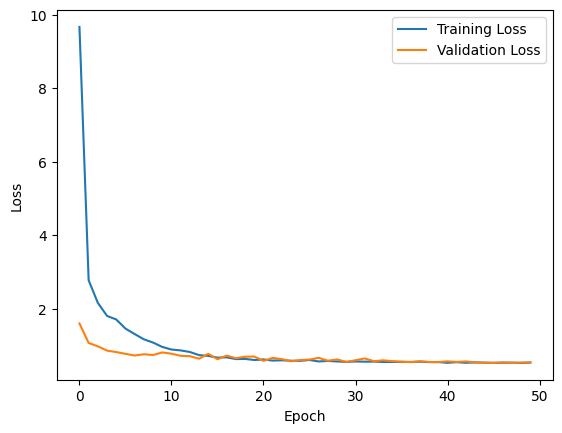

41/41 [==============================] - 0s 2ms/step
[[  0   0   2   0   0   0]
 [  0   2  35   9   0   0]
 [  0   1 273 146   0   0]
 [  0   0 137 421  21   0]
 [  0   0   7 181  33   0]
 [  0   0   0  20  12   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.67      0.04      0.08        46
           5       0.60      0.65      0.62       420
           6       0.54      0.73      0.62       579
           7       0.50      0.15      0.23       221
           8       0.00      0.00      0.00        32

    accuracy                           0.56      1300
   macro avg       0.38      0.26      0.26      1300
weighted avg       0.54      0.56      0.52      1300



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test)
# Convert predictions and target to the same shape
y_pred = y_pred.reshape(-1)
y_true = y_test.to_numpy()

# If it's a classification task, you can plot a confusion matrix
if len(set(y_true)) < 10:  # Assuming it's a classification task if there are fewer than 10 unique target values
    print(confusion_matrix(y_true, y_pred.round()))
    print(classification_report(y_true, y_pred.round()))

In [ ]:
history.history

{'loss': [9.668288230895996,
  2.7695491313934326,
  2.1534199714660645,
  1.7999377250671387,
  1.7022275924682617,
  1.454117774963379,
  1.3058371543884277,
  1.162246584892273,
  1.0735647678375244,
  0.9549856185913086,
  0.8840338587760925,
  0.8601182699203491,
  0.8168031573295593,
  0.7317911982536316,
  0.7103423476219177,
  0.6639806032180786,
  0.671109676361084,
  0.6238199472427368,
  0.6289415955543518,
  0.5987299084663391,
  0.614280641078949,
  0.5827704071998596,
  0.5908552408218384,
  0.5794335603713989,
  0.576137363910675,
  0.5990157723426819,
  0.5594809651374817,
  0.5734208822250366,
  0.5591188669204712,
  0.546474814414978,
  0.5589954853057861,
  0.5538924932479858,
  0.5547372102737427,
  0.5454279780387878,
  0.5454919934272766,
  0.5471879243850708,
  0.5466455817222595,
  0.5519134402275085,
  0.5421813726425171,
  0.5421775579452515,
  0.5224178433418274,
  0.5393769145011902,
  0.5230276584625244,
  0.5326439738273621,
  0.5264776945114136,
  0.52216